In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter
from sklearn.metrics import mean_squared_error as mse

In [6]:
def add_gaussian_noise(image, mean, std):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image * noise
    ro = np.sum(noise != 0) / (image.shape[0] * image.shape[1]) 
    return noisy_image, ro

def fourier_filter(noisy_image, k, plot):
    ffTransform = scipy.fft.fft2(noisy_image)
    ffTransform = scipy.fft.fftshift(ffTransform)
    powerSpectrum = np.abs(ffTransform)**2
    scaledPowerSpect = np.log10(powerSpectrum)
    scaledPS0 = scaledPowerSpect - np.max(scaledPowerSpect)    
    mask = scaledPS0.real > k
    maskedTransform = ffTransform*mask
    
    if plot is True:
        plt.figure(figsize=(12,9))
        plt.subplot(121), plt.imshow(scaledPowerSpect, cmap='gray')
        plt.title("Shifted Fourier Transform")
        plt.subplot(122), plt.imshow(np.log10(np.abs(1+(maskedTransform))), cmap='gray')
        plt.title("Shifted Fourier Transform with Mask")
#         cv2.imwrite('images/yerevan_shifted.jpg', normalize_image(scaledPowerSpect))
#         cv2.imwrite('images/yerevan_mask.jpg', normalize_image(np.log10(np.abs(1+(maskedTransform)))))

    inverseTransform = scipy.fft.ifftshift(maskedTransform)
    filtered_image = scipy.fft.ifft2(inverseTransform).real
    return filtered_image

def plot_images(image, noisy_image, fourier_filtered_image, gaussian_filtered_image):
    plt.figure(figsize=(12, 9))
    plt.subplot(221), plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(222), plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.subplot(223), plt.imshow(fourier_filtered_image, cmap='gray')
    plt.title('Fourier Filtered Image')
    plt.subplot(224), plt.imshow(gaussian_filtered_image, cmap='gray')
    plt.title('Gaussian Filtered Image')
    print(np.min(noisy_image), np.max(noisy_image))
    
def normalize_image(image):
    return 255*(image-np.min(image))/(np.max(image)-np.min(image))

def calculate_nmse(original_matrix, reconstructed_matrix):
    return mse(original_matrix, reconstructed_matrix) / mse(original_matrix, np.zeros(original_matrix.shape))

-670.2485501909016 1111.8556273698696
Noise matrix sparseness coefficient ρ:   1.0
NMSE between original and noised images: 1.00325411095009
NMSE between original and recovered images:
Fourier transform: 0.35418547240580817
Gaussian Filter:   0.11288729913632092


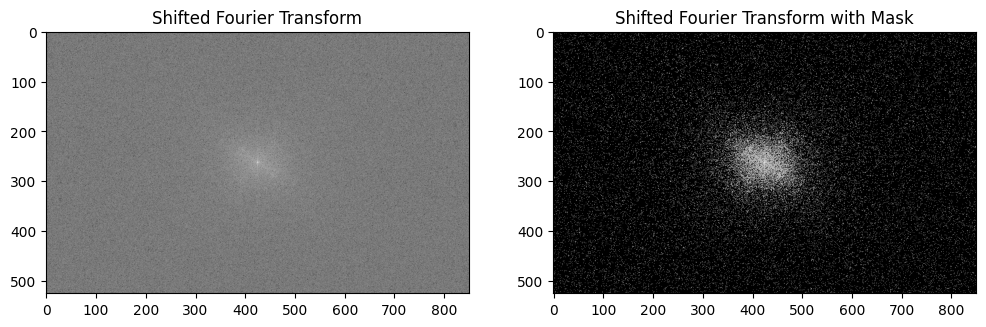

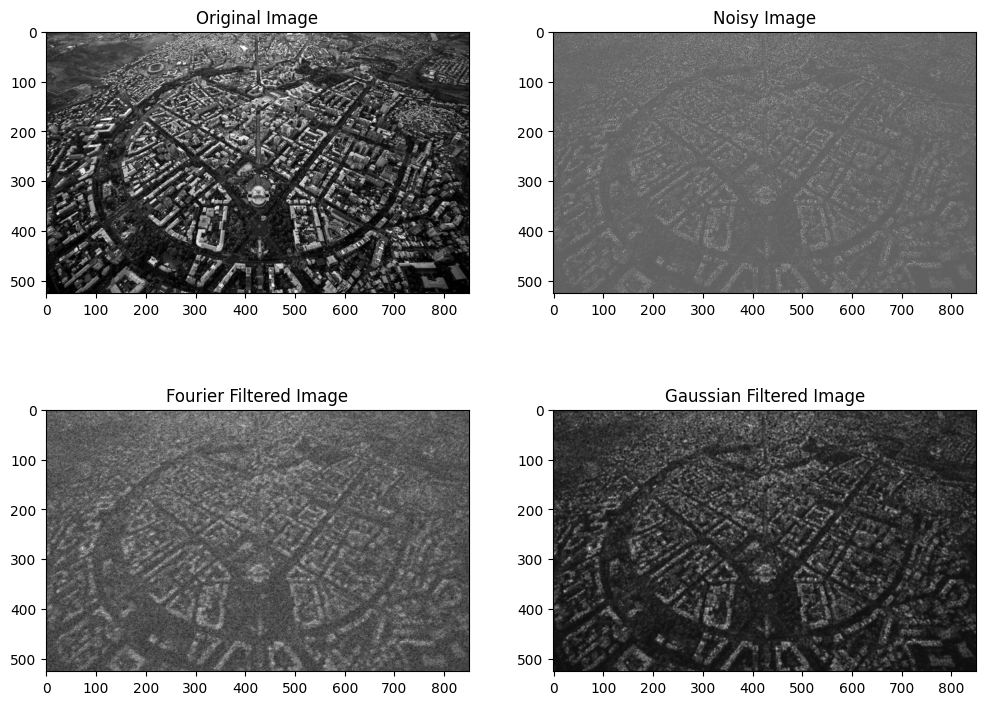

In [7]:
image = cv2.imread('images/yerevan.jpg', 0)
noisy_image, ro = add_gaussian_noise(image, mean=1, std=1)
fourier_filtered_image = fourier_filter(noisy_image, -5, plot=True)
gaussian_filtered_image = gaussian_filter(noisy_image, sigma=1)
plot_images(image, noisy_image, fourier_filtered_image, gaussian_filtered_image)
print('Noise matrix sparseness coefficient ρ:  ', ro)
print('NMSE between original and noised images:', calculate_nmse(image, noisy_image))
print('NMSE between original and recovered images:')
print('Fourier transform:', calculate_nmse(image, fourier_filtered_image))
print('Gaussian Filter:  ', calculate_nmse(image, gaussian_filtered_image))

# cv2.imwrite('images/yerevan_gray.jpg', image)
# cv2.imwrite('images/yerevan_noisy.jpg', normalize_image(noisy_image))
# cv2.imwrite('images/yerevan_fourier.jpg', normalize_image(fourier_filtered_image))
# cv2.imwrite('images/yerevan_gaussian.jpg', normalize_image(gaussian_filtered_image))

-190.46490251877518 658.0684036756011
Noise matrix sparseness coefficient ρ:   1.0
NMSE between original and noised images: 0.2529188248983166
NMSE between original and recovered images:
Fourier transform: 0.008624198845313149
Gaussian Filter:   0.020440017685646395


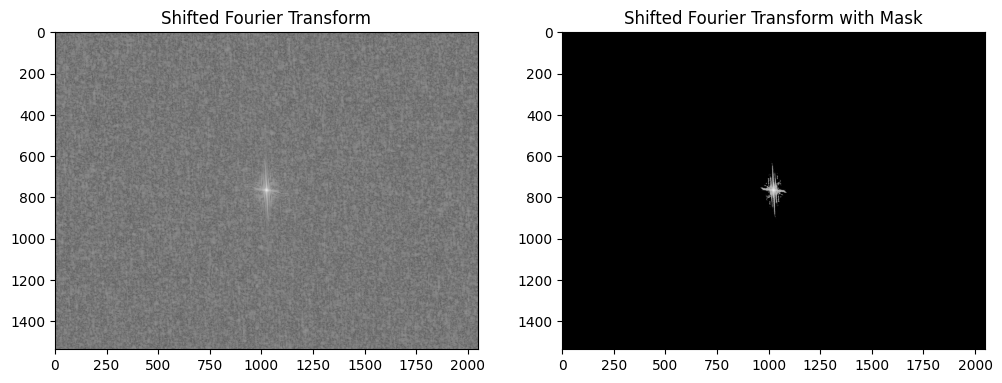

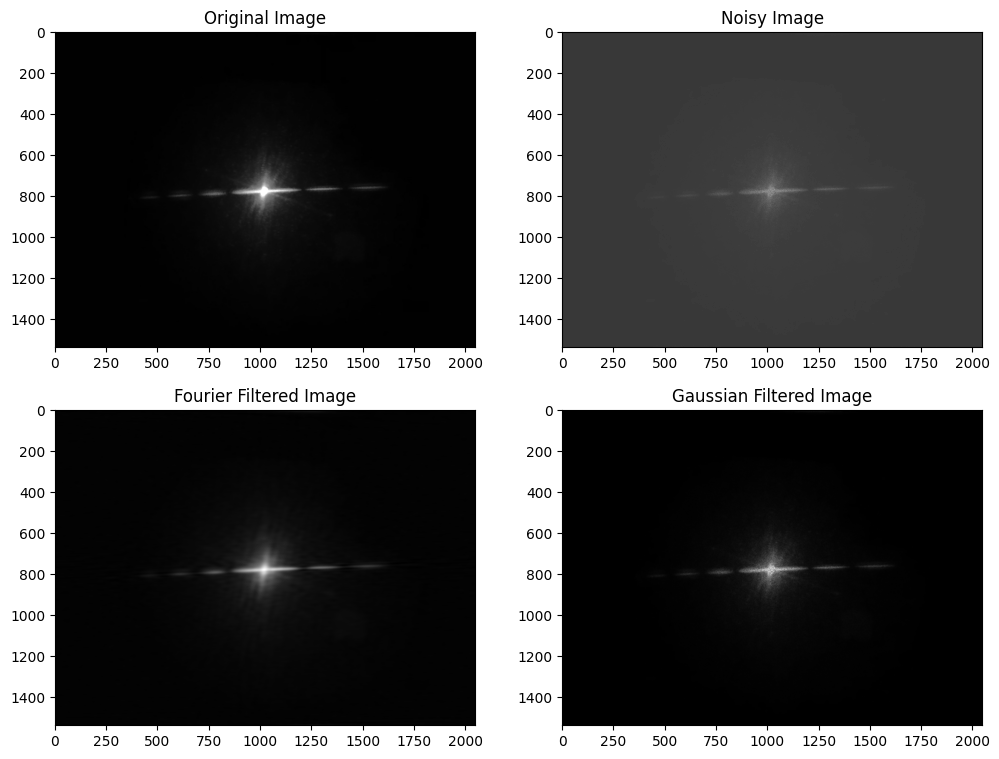

In [8]:
image = cv2.imread('images/laser.jpg', 0)
noisy_image, ro = add_gaussian_noise(image, mean=1, std=0.5)
fourier_filtered_image = fourier_filter(noisy_image, -5, True)
gaussian_filtered_image = gaussian_filter(noisy_image, 1)
plot_images(image, noisy_image, fourier_filtered_image, gaussian_filtered_image)
print('Noise matrix sparseness coefficient ρ:  ', ro)
print('NMSE between original and noised images:', calculate_nmse(image, noisy_image))
print('NMSE between original and recovered images:')
print('Fourier transform:', calculate_nmse(image, fourier_filtered_image))
print('Gaussian Filter:  ', calculate_nmse(image, gaussian_filtered_image))

# cv2.imwrite('images/laser_gray.jpg', image)
# cv2.imwrite('images/laser_noisy.jpg', normalize_image(noisy_image))
# cv2.imwrite('images/laser_fourier.jpg', normalize_image(fourier_filtered_image))
# cv2.imwrite('images/laser_gaussian.jpg', normalize_image(gaussian_filtered_image))

In [9]:
corr = np.corrcoef(image.flatten(), noisy_image.flatten())[0, 1]
print("Correlation coeficent between original and noised image:             ", corr)
corr = np.corrcoef(image.flatten(), fourier_filtered_image.flatten())[0, 1]
print("Correlation coeficent between original and Fourier transformed image:", corr)
corr = np.corrcoef(image.flatten(), gaussian_filtered_image.flatten())[0, 1]
print("Correlation coeficent between original and Gaussian filtered image:  ", corr)

Correlation coeficent between original and noised image:              0.8812029350484836
Correlation coeficent between original and Fourier transformed image: 0.9951007713038295
Correlation coeficent between original and Gaussian filtered image:   0.9885313581858377
